In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [5]:
#加载数据集，
data = pd.read_csv("/Applications/py_workspace/data_mining/data/data_breast.csv")
print(data.loc[1])

id                           842517
diagnosis                         M
radius_mean                   20.57
texture_mean                  17.77
perimeter_mean                132.9
area_mean                      1326
smoothness_mean             0.08474
compactness_mean            0.07864
concavity_mean               0.0869
concave points_mean         0.07017
symmetry_mean                0.1812
fractal_dimension_mean      0.05667
radius_se                    0.5435
texture_se                   0.7339
perimeter_se                  3.398
area_se                       74.08
smoothness_se              0.005225
compactness_se              0.01308
concavity_se                 0.0186
concave points_se            0.0134
symmetry_se                 0.01389
fractal_dimension_se       0.003532
radius_worst                  24.99
texture_worst                 23.41
perimeter_worst               158.8
area_worst                     1956
smoothness_worst             0.1238
compactness_worst           

In [6]:
#数据分析，查看数据特征，
pd.set_option('display.max_columns', None)
print(data.columns)
print(data.head(5))
print(data.describe())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42

In [8]:
#根据列名划分数据段，_mean 为数据均值，_se为标准差，_worst为最大值
#id 列无实际意义，可以删除，将B良性替换为0，M恶性替换为1
features_mean = list(data.columns[2:12])
features_se = list(data.columns[12:22])
features_worst = list(data.columns[22:32])

data.drop("id", axis = 1, inplace = True)
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

print(data['diagnosis'][1])

1


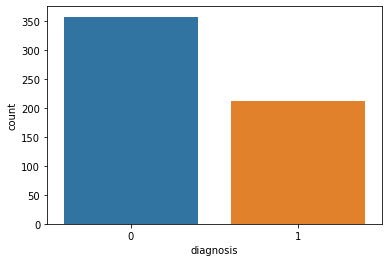

In [11]:
#查看各变量之间的相关性，用热力图呈现，将诊断结果可视化
sb.countplot(data['diagnosis'], label='Count')
plt.show()

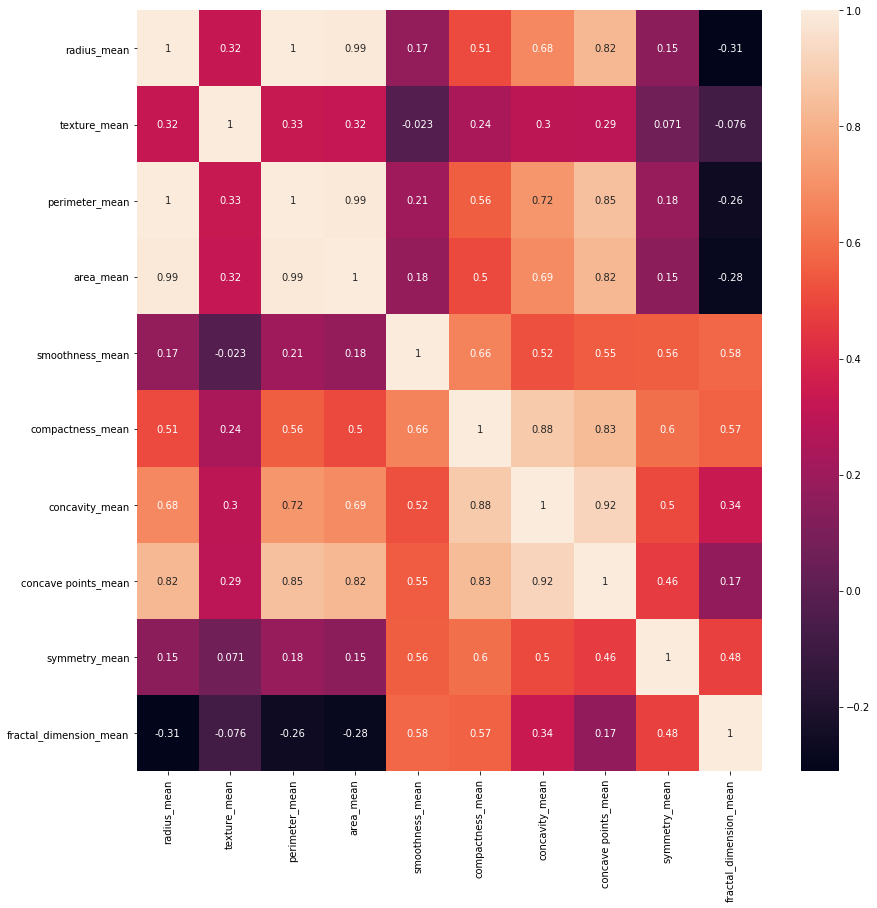

In [12]:
corr = data[features_mean].corr()
plt.figure(figsize=(14,14))
sb.heatmap(corr, annot=True)
plt.show()

In [15]:
#热力图中对角线上的为单变量自身的相关系数，均为1，颜色越浅代表相关性越大，radius_mean、perimeter_mean 和 area_mean 相关性非常大， compactness_mean、concavity_mean、concave_points_mean 这三个字段也是相关的，因此取其中的一个作为代表
# 特征选择的目的是降维，用少量的特征代表数据的特性，可以增强分类器的泛化能力，避免数据过拟合
# mean，se，worst是对同一组内容的不同度量方式，是三个维度，因此单用一个维度进行训练

features_remain = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [16]:
#划分训练集和测试集
#抽取30%的数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.3) 
train_X = train[features_remain]
train_y = train['diagnosis']
test_X = test[features_remain]
test_y = test['diagnosis']


In [17]:
#对数据进行规范化，采用z-score，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)

In [21]:
#创建svm分类器，这里采用svc，默认核函数为高斯核函数，rbf，
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
accuracy = metrics.accuracy_score(prediction,test_y)
print(accuracy)

0.9239766081871345


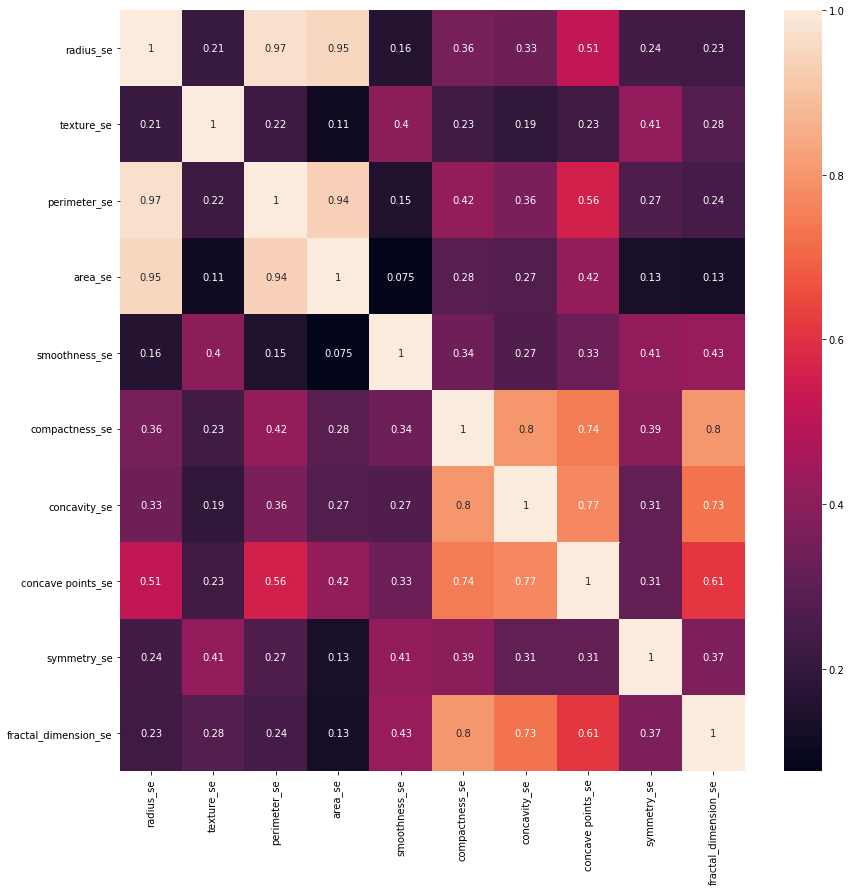

In [23]:
#取标准差特征，用linearSVC进行分类
#计算标准差相关性系数
corr = data[features_se].corr()
plt.figure(figsize=(14,14))
sb.heatmap(corr, annot=True)
plt.show()

In [27]:
#redius_se 和perimeter_se 和 area_se 相关性非常大， compactness_se、concavity_se、
# concave_points_se 这三个字段也是相关的，取和perimeter_se为代表，concave_points_se为代表
features_se_remain = ['perimeter_se', 'texture_se', 'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se']

In [28]:
#划分训练集和测试集
#抽取30%的数据作为测试集，其余作为训练集
train, test = train_test_split(data, test_size = 0.3) 
train_X = train[features_se_remain]
train_y = train['diagnosis']
test_X = test[features_se_remain]
test_y = test['diagnosis']

In [29]:
#对数据进行规范化，采用z-score，保证每个特征维度的数据均值为0，方差为1
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)

In [30]:
#创建svm分类器，这里采用LinearSVC，核函数为线性核函数，只能处理线性可分的问题。高斯核函数，多项式和函数poly，sigmoid核函数可以处理非线性可分的问题，当用sigmoid核函数时，svm实现的是多层神经网络，多项式核函数可以将数据从低维空间映射到高维空间，但参数多，计算量大
model = svm.LinearSVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
accuracy = metrics.accuracy_score(prediction,test_y)
print(accuracy)

0.8128654970760234
